# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

<hr>

<center><H1> DATA PRE-PROCESSING </H1></center>

## LOADING OF DATASET

In [2]:
data = pd.read_csv('health.csv')
data.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes,No
1,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No,No
2,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No,No
3,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes,No
4,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No,No


In [3]:
data.shape

(319795, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               319795 non-null  float64
 1   Smoking           319795 non-null  object 
 2   AlcoholDrinking   319795 non-null  object 
 3   Stroke            319795 non-null  object 
 4   PhysicalHealth    319795 non-null  int64  
 5   MentalHealth      319795 non-null  int64  
 6   DiffWalking       319795 non-null  object 
 7   Sex               319795 non-null  object 
 8   AgeCategory       319795 non-null  object 
 9   Race              319795 non-null  object 
 10  Diabetic          319795 non-null  object 
 11  PhysicalActivity  319795 non-null  object 
 12  GenHealth         319795 non-null  object 
 13  SleepTime         319795 non-null  int64  
 14  Asthma            319795 non-null  object 
 15  KidneyDisease     319795 non-null  object 
 16  SkinCancer        31

In [5]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


## Checking for Missing Values

In [6]:
data.isna().sum()

BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
HeartDisease        0
dtype: int64

## Checking for Duplicated Values

In [7]:
data.duplicated().sum()

18078

In [8]:
data.drop_duplicates(keep="first",inplace = True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.shape

(301717, 18)

## Dealing with Outliers

C:\Users\Suprit Naik\AppData\Local\Temp\ipykernel_19756\605554679.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BMI'], ax=ax[0, 0])
C:\Users\Suprit Naik\AppData\Local\Temp\ipykernel_19756\605554679.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SleepTime'], ax=ax[0, 1])
C:

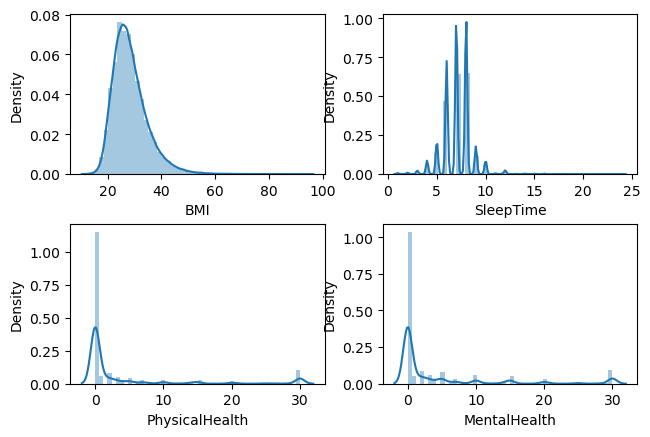

In [11]:
fig, ax = plt.subplots(2, 2)
fig.tight_layout(h_pad=2)

# Plot on specified subplots
sns.distplot(data['BMI'], ax=ax[0, 0])
sns.distplot(data['SleepTime'], ax=ax[0, 1])
sns.distplot(data['PhysicalHealth'], ax=ax[1, 0])
sns.distplot(data['MentalHealth'], ax=ax[1, 1])

#define subplot xlabel
ax[0, 0].set_xlabel('BMI')
ax[0, 1].set_xlabel('SleepTime')
ax[1, 0].set_xlabel('PhysicalHealth')
ax[1, 1].set_xlabel('MentalHealth')

plt.subplots_adjust(top=0.85)

#display the plots 
plt.show()

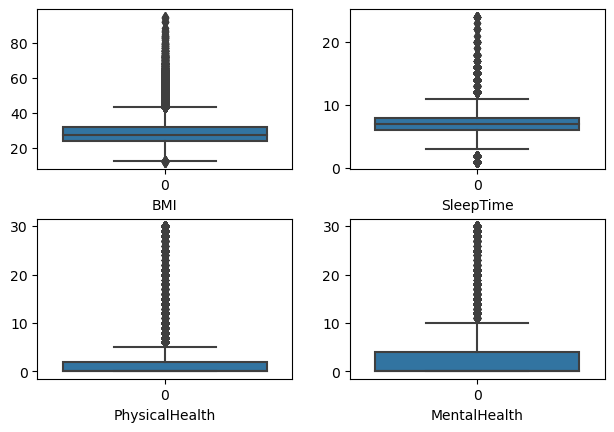

In [12]:
fig, ax = plt.subplots(2, 2)
fig.tight_layout(h_pad=2)

# Plot on specified subplots
sns.boxplot(data['BMI'], ax=ax[0, 0])
sns.boxplot(data['SleepTime'], ax=ax[0, 1])
sns.boxplot(data['PhysicalHealth'], ax=ax[1, 0])
sns.boxplot(data['MentalHealth'], ax=ax[1, 1])

#define subplot xlabel
ax[0, 0].set_xlabel('BMI')
ax[0, 1].set_xlabel('SleepTime')
ax[1, 0].set_xlabel('PhysicalHealth')
ax[1, 1].set_xlabel('MentalHealth')

plt.subplots_adjust(top=0.85)

#display the plots 
plt.show()

In [13]:
q1 = data['BMI'].quantile(0.25)
q3 = data['BMI'].quantile(0.75)
iqr = q3-q1
minimum_value = q1-1.5*iqr
maximum_value = q3+1.5*iqr

print('BMI')
print("Minimum Value = ",minimum_value);
print("Maximum Value = ",maximum_value);
#Capping
data['BMI'] = np.where(data['BMI']>maximum_value,maximum_value,
                      np.where(data['BMI']<minimum_value,minimum_value,
                              data['BMI']))

BMI
Minimum Value =  12.600000000000005
Maximum Value =  43.08


In [14]:
q1 = data['SleepTime'].quantile(0.25)
q3 = data['SleepTime'].quantile(0.75)
iqr = q3-q1
minimum_value = q1-1.5*iqr
maximum_value = q3+1.5*iqr

print('SleepTime')
print("Minimum Value = ",minimum_value);
print("Maximum Value = ",maximum_value);
#Capping
data['SleepTime'] = np.where(data['SleepTime']>maximum_value,maximum_value,
                      np.where(data['SleepTime']<minimum_value,minimum_value,
                              data['SleepTime']))

SleepTime
Minimum Value =  3.0
Maximum Value =  11.0


In [15]:
q1 = data['PhysicalHealth'].quantile(0.25)
q3 = data['PhysicalHealth'].quantile(0.75)
iqr = q3-q1
minimum_value = q1-1.5*iqr
maximum_value = q3+1.5*iqr

print('PhysicalHealth')
print("Minimum Value = ",minimum_value);
print("Maximum Value = ",maximum_value);
#Capping
data['PhysicalHealth'] = np.where(data['PhysicalHealth']>maximum_value,maximum_value,
                      np.where(data['PhysicalHealth']<minimum_value,minimum_value,
                              data['PhysicalHealth']))

PhysicalHealth
Minimum Value =  -3.0
Maximum Value =  5.0


In [16]:
q1 = data['MentalHealth'].quantile(0.25)
q3 = data['MentalHealth'].quantile(0.75)
iqr = q3-q1
minimum_value = q1-1.5*iqr
maximum_value = q3+1.5*iqr

print('MentalHealth')
print("Minimum Value = ",minimum_value);
print("Maximum Value = ",maximum_value);
#Capping
data['MentalHealth'] = np.where(data['MentalHealth']>maximum_value,maximum_value,
                      np.where(data['MentalHealth']<minimum_value,minimum_value,
                              data['MentalHealth']))

MentalHealth
Minimum Value =  -6.0
Maximum Value =  10.0


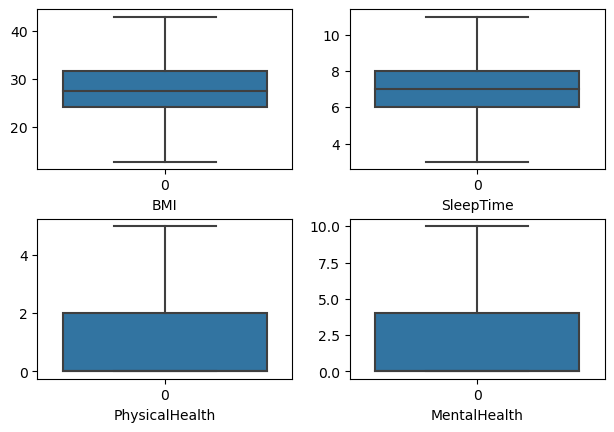

In [17]:
fig, ax = plt.subplots(2, 2)
fig.tight_layout(h_pad=2)

# Plot on specified subplots
sns.boxplot(data['BMI'], ax=ax[0, 0])
sns.boxplot(data['SleepTime'], ax=ax[0, 1])
sns.boxplot(data['PhysicalHealth'], ax=ax[1, 0])
sns.boxplot(data['MentalHealth'], ax=ax[1, 1])

#define subplot xlabel
ax[0, 0].set_xlabel('BMI')
ax[0, 1].set_xlabel('SleepTime')
ax[1, 0].set_xlabel('PhysicalHealth')
ax[1, 1].set_xlabel('MentalHealth')

plt.subplots_adjust(top=0.85)

#display the plots 
plt.show()

## Dealing with Categorical Values

In [18]:
data.head(10)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,Yes,No,No,3.0,10.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,No
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,No
2,26.58,Yes,No,No,5.0,10.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,No
4,23.71,No,No,No,5.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,No
5,28.87,Yes,No,No,5.0,0.0,Yes,Female,75-79,Black,No,No,Fair,11.0,No,No,No,Yes
6,21.63,No,No,No,5.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes,No
7,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No,No
8,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No,No
9,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No,No


In [19]:
GenHealth = ['Poor','Fair','Good','Very good','Excellent']

In [20]:
data['Smoking']=np.where(data['Smoking']=='Yes',1,0)
data['AlcoholDrinking']=np.where(data['AlcoholDrinking']=='Yes',1,0)
data['Stroke']=np.where(data['Stroke']=='Yes',1,0)
data['DiffWalking']=np.where(data['DiffWalking']=='Yes',1,0)
data['Sex']=np.where(data['Sex']=='Male',1,0)
data['PhysicalActivity']=np.where(data['PhysicalActivity']=='Yes',1,0)
data['Asthma']=np.where(data['Asthma']=='Yes',1,0)
data['KidneyDisease']=np.where(data['KidneyDisease']=='Yes',1,0)
data['SkinCancer']=np.where(data['SkinCancer']=='Yes',1,0)
data['HeartDisease']=np.where(data['HeartDisease']=='Yes',1,0)

data.head(10)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,1,0,0,3.0,10.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1,0
1,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0,0
2,26.58,1,0,0,5.0,10.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1,0
4,23.71,0,0,0,5.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0,0
5,28.87,1,0,0,5.0,0.0,1,0,75-79,Black,No,0,Fair,11.0,0,0,0,1
6,21.63,0,0,0,5.0,0.0,0,0,70-74,White,No,1,Fair,4.0,1,0,1,0
7,31.64,1,0,0,5.0,0.0,1,0,80 or older,White,Yes,0,Good,9.0,1,0,0,0
8,26.45,0,0,0,0.0,0.0,0,0,80 or older,White,"No, borderline diabetes",0,Fair,5.0,0,1,0,0
9,40.69,0,0,0,0.0,0.0,1,1,65-69,White,No,1,Good,10.0,0,0,0,0


In [21]:
agecategory_column = data['AgeCategory'].sort_values().unique()
agecategory_column

array(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
      dtype=object)

In [22]:
for i in range(len(agecategory_column)):
    data['AgeCategory']=np.where(data['AgeCategory']==agecategory_column[i],i,data['AgeCategory'])
data['AgeCategory'] = data['AgeCategory'].astype('int32')
data.head(10)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,1,0,0,3.0,10.0,0,0,7,White,Yes,1,Very good,5.0,1,0,1,0
1,20.34,0,0,1,0.0,0.0,0,0,12,White,No,1,Very good,7.0,0,0,0,0
2,26.58,1,0,0,5.0,10.0,0,1,9,White,Yes,1,Fair,8.0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,White,No,0,Good,6.0,0,0,1,0
4,23.71,0,0,0,5.0,0.0,1,0,4,White,No,1,Very good,8.0,0,0,0,0
5,28.87,1,0,0,5.0,0.0,1,0,11,Black,No,0,Fair,11.0,0,0,0,1
6,21.63,0,0,0,5.0,0.0,0,0,10,White,No,1,Fair,4.0,1,0,1,0
7,31.64,1,0,0,5.0,0.0,1,0,12,White,Yes,0,Good,9.0,1,0,0,0
8,26.45,0,0,0,0.0,0.0,0,0,12,White,"No, borderline diabetes",0,Fair,5.0,0,1,0,0
9,40.69,0,0,0,0.0,0.0,1,1,9,White,No,1,Good,10.0,0,0,0,0


In [23]:
data['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [24]:
Race_column = ['Black','White','Asian','American Indian/Alaskan Native','Hispanic','Other']
for i in range(len(Race_column)):
    data['Race']=np.where(data['Race']==Race_column[i],i,data['Race'])
data['Race'] = data['Race'].astype('int32')
data.head(10)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,1,0,0,3.0,10.0,0,0,7,1,Yes,1,Very good,5.0,1,0,1,0
1,20.34,0,0,1,0.0,0.0,0,0,12,1,No,1,Very good,7.0,0,0,0,0
2,26.58,1,0,0,5.0,10.0,0,1,9,1,Yes,1,Fair,8.0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,1,No,0,Good,6.0,0,0,1,0
4,23.71,0,0,0,5.0,0.0,1,0,4,1,No,1,Very good,8.0,0,0,0,0
5,28.87,1,0,0,5.0,0.0,1,0,11,0,No,0,Fair,11.0,0,0,0,1
6,21.63,0,0,0,5.0,0.0,0,0,10,1,No,1,Fair,4.0,1,0,1,0
7,31.64,1,0,0,5.0,0.0,1,0,12,1,Yes,0,Good,9.0,1,0,0,0
8,26.45,0,0,0,0.0,0.0,0,0,12,1,"No, borderline diabetes",0,Fair,5.0,0,1,0,0
9,40.69,0,0,0,0.0,0.0,1,1,9,1,No,1,Good,10.0,0,0,0,0


In [25]:
Diabetic_column = data['Diabetic'].unique()
Diabetic_column

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [26]:
for i in range(len(Diabetic_column)):
    data['Diabetic']=np.where(data['Diabetic']==Diabetic_column[i],i,data['Diabetic'])
data['Diabetic'] = data['Diabetic'].astype('int32')
data.head(10)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,1,0,0,3.0,10.0,0,0,7,1,0,1,Very good,5.0,1,0,1,0
1,20.34,0,0,1,0.0,0.0,0,0,12,1,1,1,Very good,7.0,0,0,0,0
2,26.58,1,0,0,5.0,10.0,0,1,9,1,0,1,Fair,8.0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,1,1,0,Good,6.0,0,0,1,0
4,23.71,0,0,0,5.0,0.0,1,0,4,1,1,1,Very good,8.0,0,0,0,0
5,28.87,1,0,0,5.0,0.0,1,0,11,0,1,0,Fair,11.0,0,0,0,1
6,21.63,0,0,0,5.0,0.0,0,0,10,1,1,1,Fair,4.0,1,0,1,0
7,31.64,1,0,0,5.0,0.0,1,0,12,1,0,0,Good,9.0,1,0,0,0
8,26.45,0,0,0,0.0,0.0,0,0,12,1,2,0,Fair,5.0,0,1,0,0
9,40.69,0,0,0,0.0,0.0,1,1,9,1,1,1,Good,10.0,0,0,0,0


In [27]:
data['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [28]:
GenHealth_column = ['Poor','Fair','Good','Very good','Excellent']
for i in range(len(GenHealth_column)):
    data['GenHealth']=np.where(data['GenHealth']==GenHealth_column[i],i,data['GenHealth'])
data['GenHealth'] = data['GenHealth'].astype('int32')
data.head(10)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,1,0,0,3.0,10.0,0,0,7,1,0,1,3,5.0,1,0,1,0
1,20.34,0,0,1,0.0,0.0,0,0,12,1,1,1,3,7.0,0,0,0,0
2,26.58,1,0,0,5.0,10.0,0,1,9,1,0,1,1,8.0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,1,1,0,2,6.0,0,0,1,0
4,23.71,0,0,0,5.0,0.0,1,0,4,1,1,1,3,8.0,0,0,0,0
5,28.87,1,0,0,5.0,0.0,1,0,11,0,1,0,1,11.0,0,0,0,1
6,21.63,0,0,0,5.0,0.0,0,0,10,1,1,1,1,4.0,1,0,1,0
7,31.64,1,0,0,5.0,0.0,1,0,12,1,0,0,2,9.0,1,0,0,0
8,26.45,0,0,0,0.0,0.0,0,0,12,1,2,0,1,5.0,0,1,0,0
9,40.69,0,0,0,0.0,0.0,1,1,9,1,1,1,2,10.0,0,0,0,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               301717 non-null  float64
 1   Smoking           301717 non-null  int32  
 2   AlcoholDrinking   301717 non-null  int32  
 3   Stroke            301717 non-null  int32  
 4   PhysicalHealth    301717 non-null  float64
 5   MentalHealth      301717 non-null  float64
 6   DiffWalking       301717 non-null  int32  
 7   Sex               301717 non-null  int32  
 8   AgeCategory       301717 non-null  int32  
 9   Race              301717 non-null  int32  
 10  Diabetic          301717 non-null  int32  
 11  PhysicalActivity  301717 non-null  int32  
 12  GenHealth         301717 non-null  int32  
 13  SleepTime         301717 non-null  float64
 14  Asthma            301717 non-null  int32  
 15  KidneyDisease     301717 non-null  int32  
 16  SkinCancer        30

## Splitting of Data
### Heart Diease

In [30]:
X = data.iloc[:, :-4].values
y = data.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [31]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 17, activation ='relu'))
model.add(tf.keras.layers.Dense(units = 8, activation ='relu'))
model.add(tf.keras.layers.Dense(units = 4, activation ='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation ='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [32]:
model.fit(X_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10


7543/7543 [==============================] - 26s 3ms/step - loss: 0.2503 - accuracy: 0.9086
Epoch 2/10
7543/7543 [==============================] - 24s 3ms/step - loss: 0.2412 - accuracy: 0.9097
Epoch 3/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.2406 - accuracy: 0.9097
Epoch 4/10
7543/7543 [==============================] - 22s 3ms/step - loss: 0.2399 - accuracy: 0.9097
Epoch 5/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.2395 - accuracy: 0.9097
Epoch 6/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.2392 - accuracy: 0.9097
Epoch 7/10
7543/7543 [==============================] - 24s 3ms/step - loss: 0.2388 - accuracy: 0.9097
Epoch 8/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.2388 - accuracy: 0.9097
Epoch 9/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.2387 - accuracy: 0.9097
Epoch 10/10
7543/7543 [==============================] - 23s 3ms/step -

In [33]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

1886/1886 [==============================] - 5s 2ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[54876     0]
 [ 5468     0]]


0.9093861858676919

In [35]:
model.save('model_heart.h5')

C:\Users\Suprit Naik\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Cancer

In [36]:
y2 = data.iloc[:, -2].values

from sklearn.model_selection import train_test_split
y2_train, y2_test = train_test_split(y2, test_size = 0.2, random_state = 0)

In [37]:
model.fit(X_train, y2_train, batch_size = 32, epochs = 10)

Epoch 1/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.2764 - accuracy: 0.9027
Epoch 2/10
7543/7543 [==============================] - 24s 3ms/step - loss: 0.2697 - accuracy: 0.9027
Epoch 3/10
7543/7543 [==============================] - 22s 3ms/step - loss: 0.2665 - accuracy: 0.9027
Epoch 4/10
7543/7543 [==============================] - 24s 3ms/step - loss: 0.2660 - accuracy: 0.9027
Epoch 5/10
7543/7543 [==============================] - 24s 3ms/step - loss: 0.2658 - accuracy: 0.9027
Epoch 6/10
7543/7543 [==============================] - 22s 3ms/step - loss: 0.2657 - accuracy: 0.9027
Epoch 7/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.2656 - accuracy: 0.9027
Epoch 8/10
7543/7543 [==============================] - 24s 3ms/step - loss: 0.2656 - accuracy: 0.9027
Epoch 9/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.2655 - accuracy: 0.9027
Epoch 10/10
7543/7543 [==============================] - 23s 3ms/step - l

In [38]:
y2_pred = model.predict(X_test)
y2_pred = (y2_pred > 0.5)
print(np.concatenate((y2_pred.reshape(len(y2_pred),1), y2_test.reshape(len(y2_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y2_test, y2_pred)
print(cm)
accuracy_score(y2_test, y2_pred)

1886/1886 [==============================] - 4s 2ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[54529     0]
 [ 5815     0]]


0.9036358212912634

In [39]:
model.save('model_cancer.h5')

C:\Users\Suprit Naik\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Kidney

In [40]:
y3 = data.iloc[:, -3].values

from sklearn.model_selection import train_test_split
y3_train, y3_test = train_test_split(y3, test_size = 0.2, random_state = 0)

In [41]:
model.fit(X_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.2420 - accuracy: 0.9097
Epoch 2/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.2387 - accuracy: 0.9097
Epoch 3/10
7543/7543 [==============================] - 24s 3ms/step - loss: 0.2381 - accuracy: 0.9098
Epoch 4/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.2379 - accuracy: 0.9107
Epoch 5/10
7543/7543 [==============================] - 25s 3ms/step - loss: 0.2376 - accuracy: 0.9108
Epoch 6/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.2375 - accuracy: 0.9108
Epoch 7/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.2372 - accuracy: 0.9110
Epoch 8/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.2374 - accuracy: 0.9110
Epoch 9/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.2372 - accuracy: 0.9110
Epoch 10/10
7543/7543 [==============================] - 23s 3ms/step - l

In [42]:
y3_pred = model.predict(X_test)
y3_pred = (y3_pred > 0.5)
print(np.concatenate((y3_pred.reshape(len(y3_pred),1), y_test.reshape(len(y3_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y3_test, y3_pred)
print(cm)
accuracy_score(y3_test, y3_pred)

1886/1886 [==============================] - 4s 2ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]
[[57162   781]
 [ 2190   211]]


0.9507656104998011

In [43]:
model.save('model_kidney.h5')

C:\Users\Suprit Naik\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Asthama

In [44]:
y4 = data.iloc[:, -4].values

from sklearn.model_selection import train_test_split
y4_train, y4_test = train_test_split(y4, test_size = 0.2, random_state = 0)

In [45]:
model.fit(X_train, y4_train, batch_size = 32, epochs = 10)

Epoch 1/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.3915 - accuracy: 0.8587
Epoch 2/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.3884 - accuracy: 0.8588
Epoch 3/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.3881 - accuracy: 0.8589
Epoch 4/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.3877 - accuracy: 0.8589
Epoch 5/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.3876 - accuracy: 0.8588
Epoch 6/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.3875 - accuracy: 0.8589
Epoch 7/10
7543/7543 [==============================] - 22s 3ms/step - loss: 0.3873 - accuracy: 0.8588
Epoch 8/10
7543/7543 [==============================] - 23s 3ms/step - loss: 0.3873 - accuracy: 0.8588
Epoch 9/10
7543/7543 [==============================] - 22s 3ms/step - loss: 0.3872 - accuracy: 0.8589
Epoch 10/10
7543/7543 [==============================] - 22s 3ms/step - l

In [46]:
y4_pred = model.predict(X_test)
y4_pred = (y4_pred > 0.5)
print(np.concatenate((y4_pred.reshape(len(y4_pred),1), y4_test.reshape(len(y4_test),1)),1))

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y4_test, y4_pred)
print(cm)
accuracy_score(y4_test, y4_pred)

1886/1886 [==============================] - 4s 2ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
[[51752    34]
 [ 8519    39]]


0.85826262760175

In [47]:
model.save('model_asthama.h5')

C:\Users\Suprit Naik\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
